# Predicting Chance of Survival for Titanic Passangers

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [46]:
df = pd.read_csv('train.csv')
df.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [47]:
# Categorical features include Pclass, Sex, SibSp, Parch, Cabin, Embarked
# Continuous features include Age, Fare

# Exploratory Data Analysis


In [76]:
df.shape

(891, 12)

In [77]:
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

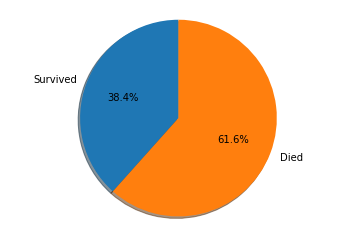

In [130]:
# Survived
sizes = [df.loc[df['Survived'] == 1].shape[0], df.loc[df['Survived'] == 0].shape[0]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=['Survived', 'Died'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

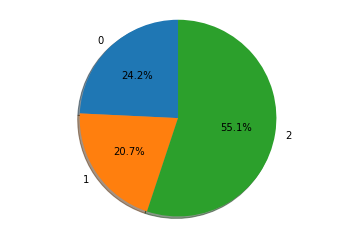

In [132]:
# Pclass proportions
sizes = [df.loc[df['Pclass'] == 1].shape[0], df.loc[df['Pclass'] == 2].shape[0], df.loc[df['Pclass'] == 3].shape[0]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=['0', '1', '2'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

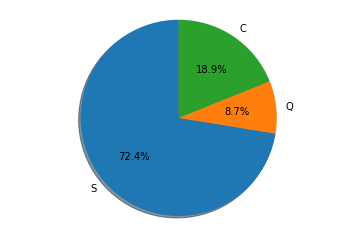

In [78]:
# Embarked proportions
labels = 'S', 'Q', 'C'
sizes = [df.loc[df['Embarked'] == 'S'].shape[0], df.loc[df['Embarked'] == 'Q'].shape[0], df.loc[df['Embarked'] == 'C'].shape[0]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

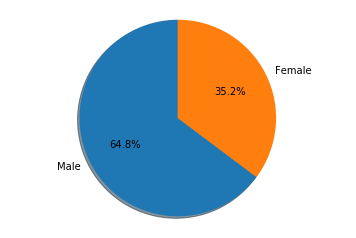

In [79]:
labels = 'Male', 'Female'
sizes = [df.loc[df['Sex'] == 'male'].shape[0], df.loc[df['Sex'] == 'female'].shape[0]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  
plt.show()

In [137]:
# AGE
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

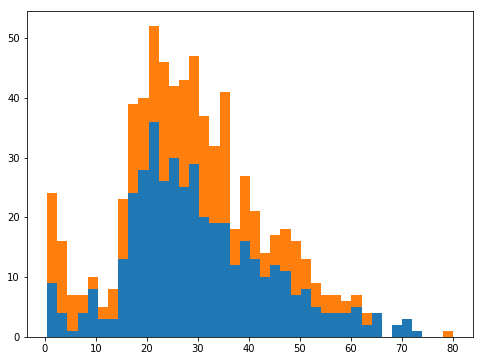

In [127]:
survived = df.loc[df['Survived'] == 1]
survived = survived[pd.notnull(survived['Age'])]

died = df.loc[df['Survived'] == 0]
died = died[pd.notnull(died['Age'])]

plt.figure(figsize = (8,6))
plt.hist([died.Age.values, survived.Age.values], 40, stacked=True, label=[])
plt.show()

In [12]:
# Fare distribution
df['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11b635080>]],
      dtype=object)

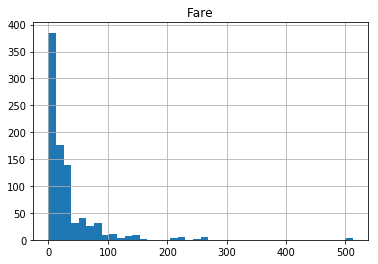

In [136]:
df.hist(column='Fare', bins=40)

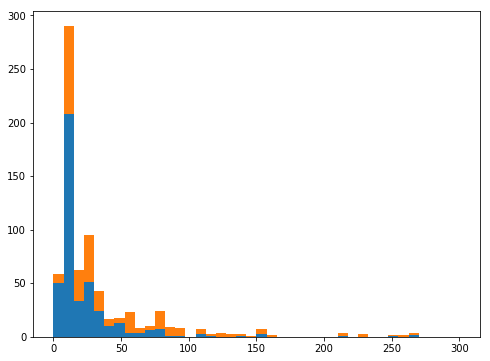

In [135]:
plt.figure(figsize = (8,6))
plt.hist([died.Fare.values, survived.Fare.values], 40, stacked=True, label=[], range=(0, 300))
plt.show()

In [ ]:
# Can patterns be found in regards to the ticket and cabin features and surivival?
# Potential patterns: families tend to stay together; if families share the same ticket number (or have ticket numbers
# that follow each other consecutively), it is likely that they all share the same fate.

# Feature Selection

# Feature Transformations

In [ ]:
class cleaner(object):
    def __init__(self):
        self.meanPrice = []
        
    def ageSet(self,row):
        if row.Age <= 18:
            age = 0
        elif row.Age <= 35:
            age = 1
        elif row.Age <= 50:
            age = 2
        else:
            age = 3
        return age

    def aloneSet(self,row):
        #TODO Create status for if have parent or child
        #If traveling alone then alone = 1

        alone = 0
        if int(row.SibSp) == 0 and int(row.Parch) == 0:
            alone = 1
        return alone

    def ticketPriceSet(self,row):
        index = row.Pclass
        if row.Fare > row.meanTicketPrice:
            ticketPrice = 1
        else:
            ticketPrice = 0
        return ticketPrice
        
    def titanicClean(self,df, ageContinuous = False):
        #made id an index
        df = df.set_index('PassengerId')

        df = df.drop([])

        # replace age with child young adult elder
        # if age is unknown Elder
        print(df.columns)
        if ageContinuous:
            df.Age = df.Age.fillna(method = 'bfill')
        else:
            df['AgeClass'] = df.apply(self.ageSet, axis = 1)
            df = df.drop(['Age'], axis = 1)
        #Create alone
        df['Alone'] = df.apply(self.aloneSet, axis = 1)
                

        #find mean of fare
        for i in np.unique(df['Pclass']):
            self.meanPrice.append(df.Fare[df['Pclass'] == int(i)].mean(axis = 0))
        self.meanPrice = [0] + self.meanPrice

        #create column of array out of mean array
        #need to do this b/c apply function is weird
        tempTicketMean = []
        for index, row in df.iterrows():
            tempTicketMean.append(self.meanPrice[row.Pclass])    
        
        #Create ticket Price Column
        df['meanTicketPrice'] = tempTicketMean
        df['ticketPrice'] = df.apply(self.ticketPriceSet, axis = 1)

        df.Embarked = df.Embarked.fillna(value = 'S')
        #Change female to int
        #df['Sex'] = df['Sex'].map({'female': 1, 'male': 0})
        
        
        #df['Embarked'] = df['Embarked'].map({'Q': 1, 'S': 0, 'C':2})
        #drop uneeded columns
        df = df.drop(['Name','SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'meanTicketPrice'],axis = 1)
        
        # df = pd.get_dummies(data = df, columns=['Pclass', 'AgeClass', 'Embarked'])
        
        return df

# Baseline Model

In [ ]:
def baseLine(row):
    if row.Pclass == 1:
        survived = 1
    elif row.Sex == 'female':
        survived = 1
    elif row.Age <= 12:
        survived = 1
    else:
        survived = 0
    return str(row.PassengerId) + " " + str(survived)

def baselinePredict(X):
    predict = X.apply(baseLine, axis = 1)
    return  pd.DataFrame(predict.str.split(' ',1).tolist(),
                         columns = ['PassengerId','Predict']).apply(pd.to_numeric)

In [ ]:
def score(test):
    #baseline Score
    predict = baselinePredict(test)
    
    merged = pd.merge(test,predict)
    answers = pd.read_csv('gender_submission.csv')
    final = pd.merge(merged, answers, on = 'PassengerId')
    print((final.Survived == final.Predict * 1).sum()/ merged.shape[0])

# Model Selection

In [ ]:
# Why decision tree is appropriate 
# Why decision forest is not going to help us